In [1]:
# library
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import hangul_font
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn_extra.cluster import KMedoids


In [2]:
# data
df = pd.read_excel("seoul_gu_sco_v2.xlsx")
df.head()
df.info()

df2 = pd.read_csv("동별_지수2.csv")
df2.head()
df2.info()

,result,시군구
0,9.192956,종로구
1,7.299337,중구
2,11.571015,용산구
3,9.307847,성동구
4,12.389070,광진구


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   result  25 non-null     float64
 1   시군구     25 non-null     object 
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


,시군구,행정동,최종지수
0,종로구,사직동,12.171837
1,종로구,삼청동,8.794331
2,종로구,부암동,11.909092
3,종로구,평창동,15.632887
4,종로구,무악동,10.954920


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     425 non-null    object 
 1   행정동     425 non-null    object 
 2   최종지수    425 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.1+ KB


In [3]:
data=pd.merge(df,df2,on="시군구")
data

,result,시군구,행정동,최종지수
0,9.192956,종로구,사직동,12.171837
1,9.192956,종로구,삼청동,8.794331
2,9.192956,종로구,부암동,11.909092
3,9.192956,종로구,평창동,15.632887
4,9.192956,종로구,무악동,10.954920
...,...,...,...,...
420,25.633619,강동구,둔촌1동,6.900000
421,25.633619,강동구,둔촌2동,18.653155
422,25.633619,강동구,암사1동,26.646641
423,25.633619,강동구,천호2동,27.124168


In [6]:
df_clu=data.iloc[:,[0,3]]
df_clu

,result,최종지수
0,9.192956,12.171837
1,9.192956,8.794331
2,9.192956,11.909092
3,9.192956,15.632887
4,9.192956,10.954920
...,...,...
420,25.633619,6.900000
421,25.633619,18.653155
422,25.633619,26.646641
423,25.633619,27.124168


In [7]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(df_clu)
std_df = pd.DataFrame(standardScaler.transform(df_clu),columns=["result","최종지수"])
std_df

StandardScaler()

,result,최종지수
0,-1.386583,-1.106428
1,-1.386583,-1.735670
2,-1.386583,-1.155379
3,-1.386583,-0.461622
4,-1.386583,-1.333144
...,...,...
420,1.703536,-2.088591
421,1.703536,0.101065
422,1.703536,1.590280
423,1.703536,1.679245


<Figure size 864x432 with 0 Axes>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='result', ylabel='최종지수'>

Text(0.5, 1.0, 'KMedoids Clustering')

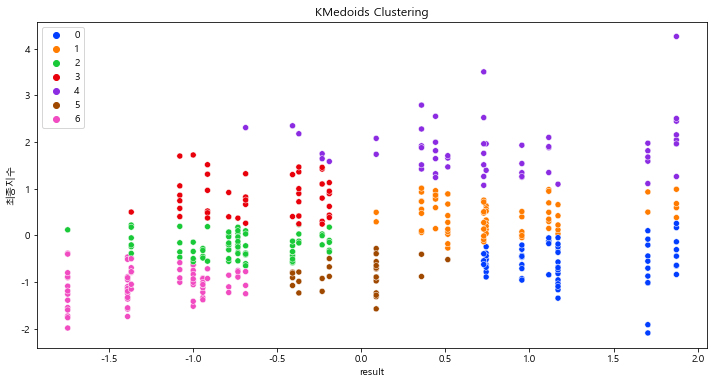

In [12]:
km = KMedoids(n_clusters=7)

cluster = km.fit(std_df)

cluster_id = pd.DataFrame(cluster.labels_)

d1 = pd.concat([std_df, cluster_id], axis=1)

d1.columns = ["result", "최종지수", "labels"]
plt.figure(1 , figsize = (12, 6))
sns.scatterplot(d1["result"], d1["최종지수"], hue = d1['labels'], legend="full", palette="bright")

plt.title("KMedoids Clustering")

plt.legend()
plt.show()